# Taking Input and Predicting Output

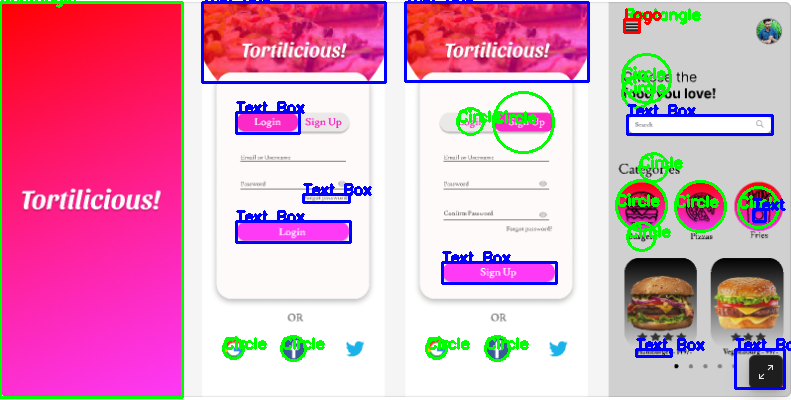

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to preprocess the image
def preprocess_image(image):
    """
    Preprocesses the input image by converting it to grayscale and applying Gaussian blur.

    Args:
    - image: Input image (BGR color space)

    Returns:
    - preprocessed_image: Preprocessed image (grayscale)
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred

# Function to detect elements in the image
def detect_elements(image_path):
    """
    Detects elements in the input image using contour detection.

    Args:
    - image_path: Path to the input image

    Returns:
    - None (Displays the image with detected elements)
    """
    # Read the image
    image = cv2.imread(image_path)

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Perform edge detection
    edges = cv2.Canny(preprocessed_image, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store detected rectangles and circles
    detected_rectangles = []
    detected_circles = []
    detected_logos = []
    detected_text_boxes = []

    # Iterate through detected contours
    for contour in contours:
        # Calculate contour area
        area = cv2.contourArea(contour)

        # Ignore small contours (noise)
        if area > 100:
            # Approximate the contour to a polygon
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Get the number of vertices
            vertices = len(approx)

            # Classify contours based on the number of vertices
            if vertices == 4:
                # Rectangle (e.g., button, input field)
                detected_rectangles.append(cv2.boundingRect(approx))

                # Check if the rectangle resembles a logo based on aspect ratio
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = w / h
                if 0.5 < aspect_ratio < 2:
                    detected_logos.append((x, y, w, h))
            elif vertices >= 8:
                # Circle (e.g., radio button, checkbox)
                (x, y), radius = cv2.minEnclosingCircle(contour)
                detected_circles.append((int(x), int(y), int(radius)))
            elif vertices > 4:
                # Text box (irregular shape)
                detected_text_boxes.append(cv2.boundingRect(approx))

    # Draw detected rectangles
    for rect in detected_rectangles:
        x, y, w, h = rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, 'Rectangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Draw detected circles
    for circle in detected_circles:
        center, radius = circle[:2], circle[2]
        cv2.circle(image, center, radius, (0, 255, 0), 2)
        cv2.putText(image, 'Circle', (center[0] - radius, center[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Draw detected logos
    for logo in detected_logos:
        x, y, w, h = logo
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, 'Logo', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Draw detected text boxes
    for textbox in detected_text_boxes:
        x, y, w, h = textbox
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, 'Text Box', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with detected elements
    cv2_imshow(image)

# Example usage
image_path = '/content/Screenshot 2024-03-23 233800.png'  # Replace with the path to your image
detect_elements(image_path)


# Printing the predicted elements

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to preprocess the image
def preprocess_image(image):
    """
    Preprocesses the input image by converting it to grayscale and applying Gaussian blur.

    Args:
    - image: Input image (BGR color space)

    Returns:
    - preprocessed_image: Preprocessed image (grayscale)
    """
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return blurred

# Function to detect elements in the image
def detect_elements(image_path):
    """
    Detects elements in the input image using contour detection.

    Args:
    - image_path: Path to the input image

    Returns:
    - detected_elements: Dictionary containing detected elements and their positions
    """
    # Read the image
    image = cv2.imread(image_path)

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Perform edge detection
    edges = cv2.Canny(preprocessed_image, 50, 150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize lists to store detected rectangles and circles
    detected_rectangles = []
    detected_circles = []
    detected_logos = []
    detected_text_boxes = []

    # Iterate through detected contours
    for contour in contours:
        # Calculate contour area
        area = cv2.contourArea(contour)

        # Ignore small contours (noise)
        if area > 100:
            # Approximate the contour to a polygon
            epsilon = 0.02 * cv2.arcLength(contour, True)
            approx = cv2.approxPolyDP(contour, epsilon, True)

            # Get the number of vertices
            vertices = len(approx)

            # Classify contours based on the number of vertices
            if vertices == 4:
                # Rectangle (e.g., button, input field)
                detected_rectangles.append(cv2.boundingRect(approx))

                # Check if the rectangle resembles a logo based on aspect ratio
                x, y, w, h = cv2.boundingRect(approx)
                aspect_ratio = w / h
                if 0.5 < aspect_ratio < 2:
                    detected_logos.append((x, y, w, h))
            elif vertices >= 8:
                # Circle (e.g., radio button, checkbox)
                (x, y), radius = cv2.minEnclosingCircle(contour)
                detected_circles.append((int(x), int(y), int(radius)))
            elif vertices > 4:
                # Text box (irregular shape)
                detected_text_boxes.append(cv2.boundingRect(approx))

    # Prepare dictionary to store detected elements
    detected_elements = {'Rectangles': detected_rectangles,
                         'Circles': detected_circles,
                         'Logos': detected_logos,
                         'Text Boxes': detected_text_boxes}

    return detected_elements

# Function to print detected elements
def print_detected_elements(detected_elements):
    """
    Prints the detected elements along with their positions.

    Args:
    - detected_elements: Dictionary containing detected elements and their positions

    Returns:
    - None
    """
    for element_type, elements in detected_elements.items():
        print(f'Detected {element_type}:')
        for index, element in enumerate(elements, start=1):
            print(f'{element_type} {index}: {element}')
        print('\n')

# Example usage
image_path = '/content/Screenshot 2024-03-23 233800.png'  # Replace with the path to your image
detected_elements = detect_elements(image_path)
print_detected_elements(detected_elements)


Detected Rectangles:
Rectangles 1: (624, 19, 15, 13)
Rectangles 2: (0, 2, 182, 395)


Detected Circles:
Circles 1: (436, 348, 10)
Circles 2: (233, 348, 10)
Circles 3: (497, 348, 12)
Circles 4: (293, 348, 12)
Circles 5: (641, 236, 14)
Circles 6: (758, 207, 20)
Circles 7: (700, 206, 25)
Circles 8: (641, 205, 25)
Circles 9: (653, 167, 14)
Circles 10: (470, 121, 13)
Circles 11: (523, 122, 30)
Circles 12: (637, 92, 15)
Circles 13: (646, 78, 24)


Detected Logos:
Logos 1: (624, 19, 15, 13)


Detected Text Boxes:
Text Boxes 1: (735, 349, 49, 39)
Text Boxes 2: (636, 349, 35, 7)
Text Boxes 3: (442, 262, 114, 21)
Text Boxes 4: (236, 221, 114, 21)
Text Boxes 5: (753, 209, 12, 12)
Text Boxes 6: (303, 194, 46, 8)
Text Boxes 7: (627, 115, 145, 19)
Text Boxes 8: (236, 112, 63, 21)
Text Boxes 9: (405, 2, 183, 79)
Text Boxes 10: (202, 2, 183, 80)


